# Handwritten Character Recognition with EMNIST Dataset with Classification using CNN


Dataset: EMNIST dataset is a set of handwritten letters and digits in 28x28 pizel image format.

Our goal is to implement a pipeline for handwritten character recognition with letters and numbers using the EMNIST dataset, a CNN model, and incorporating all additional enhancements like data augmentation, error analysis, and hyperparameter tuning.

ByClass dataset is prefered because it ontains digits and uppercase and lowercase letters and therefore is balanced.

**Download Emnist dataset**

There are multiple ways of doing this, there is also a Kagglehub API. The zip file is rather large so I will be importing the ByClass train and test data cvs files from the zip file.

Emnist library fails to retrieve everything and shows a "BadZipFile: File is not a zip file error" despite it being saved in data files. [will attempt to work on it when I can]

In [2]:
''' pip install emnist
from emnist import extract_training_samples, extract_test_samples

# Extract training and test samples
X_train_raw, y_train_raw = extract_training_samples('byclass')
X_test_raw, y_test_raw = extract_test_samples('byclass')
'''

" pip install emnist\nfrom emnist import extract_training_samples, extract_test_samples\n\n# Extract training and test samples\nX_train_raw, y_train_raw = extract_training_samples('byclass')\nX_test_raw, y_test_raw = extract_test_samples('byclass')\n"

**Import libraries for data split**

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv(r"C:\\\\\emnist-byclass-train.csv", header=None) 
test_df = pd.read_csv(r"C:\\\\\emnist-byclass-test.csv", header=None) 

y_train_raw = train_df.iloc[:, 0]  
X_train_raw = train_df.iloc[:, 1:]  

y_test_raw = test_df.iloc[:, 0]
X_test_raw = test_df.iloc[:, 1:]

print(f"Training data shape: {X_train_raw.shape}, Labels shape: {y_train_raw.shape}")
print(f"Testing data shape: {X_test_raw.shape}, Labels shape: {y_test_raw.shape}")


Training data shape: (697932, 784), Labels shape: (697932,)
Testing data shape: (116323, 784), Labels shape: (116323,)


**Preprocess the Data**

Normalize the pixel values to the range [0, 1].

*   Normalize the pixel values to the range [0, 1].
*   Reshape the images into (28, 28, 1) format for CNN input.
*   Convert labels to one-hot encoding.

In [ ]:
from tensorflow.keras.utils import to_categorical

X_train = X_train_raw.values / 255.0
X_test = X_test_raw.values / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train_raw, num_classes=62)
y_test = to_categorical(y_test_raw, num_classes=62)

print(f"Reshaped training data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Reshaped testing data: {X_test.shape}, Labels: {y_test.shape}")



Reshaped training data: (697932, 28, 28, 1), Labels: (697932, 62)
Reshaped testing data: (116323, 28, 28, 1), Labels: (116323, 62)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

**Build a K-NN**


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)


knn_classifier = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  
knn_classifier.fit(X_train_flat, y_train_int)


y_pred = knn_classifier.predict(X_test_flat)

accuracy = accuracy_score(y_test_int, y_pred)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")

KNN Accuracy: 81.04%


**Basic MLP**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

mlp = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')
])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
mlp_test_loss, mlp_test_accuracy = mlp.evaluate(X_test, y_test)
print("MLP Test Accuracy:", mlp_test_accuracy)

Epoch 1/10
5453/5453 [==============================] - 47s 8ms/step - loss: 0.9115 - accuracy: 0.7245 - val_loss: 0.5428 - val_accuracy: 0.8156
Epoch 2/10
5453/5453 [==============================] - 45s 8ms/step - loss: 0.7058 - accuracy: 0.7739 - val_loss: 0.5072 - val_accuracy: 0.8242
Epoch 3/10
5453/5453 [==============================] - 45s 8ms/step - loss: 0.6728 - accuracy: 0.7829 - val_loss: 0.4960 - val_accuracy: 0.8279
Epoch 4/10
5453/5453 [==============================] - 45s 8ms/step - loss: 0.6582 - accuracy: 0.7874 - val_loss: 0.4859 - val_accuracy: 0.8320
Epoch 5/10
5453/5453 [==============================] - 45s 8ms/step - loss: 0.6474 - accuracy: 0.7898 - val_loss: 0.4833 - val_accuracy: 0.8324
Epoch 6/10
5453/5453 [==============================] - 46s 8ms/step - loss: 0.6410 - accuracy: 0.7922 - val_loss: 0.4814 - val_accuracy: 0.8313
Epoch 7/10
5453/5453 [==============================] - 46s 8ms/step - loss: 0.6363 - accuracy: 0.7928 - val_loss: 0.4762 - val_ac

** **

**Build the CNN model to classify handwritten characters**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

**Train the Model**

In [ ]:
datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    validation_data=(X_test, y_test),
    epochs=5,
    steps_per_epoch=len(X_train) // 128
)

Epoch 1/5
5452/5452 [==============================] - 336s 62ms/step - loss: 0.5888 - accuracy: 0.8009 - val_loss: 0.4006 - val_accuracy: 0.8519
Epoch 2/5
5452/5452 [==============================] - 356s 65ms/step - loss: 0.5627 - accuracy: 0.8085 - val_loss: 0.4212 - val_accuracy: 0.8434
Epoch 3/5
5452/5452 [==============================] - 394s 72ms/step - loss: 0.5485 - accuracy: 0.8131 - val_loss: 0.4067 - val_accuracy: 0.8488
Epoch 4/5
5452/5452 [==============================] - 403s 74ms/step - loss: 0.5380 - accuracy: 0.8162 - val_loss: 0.3967 - val_accuracy: 0.8513
Epoch 5/5
5452/5452 [==============================] - 397s 73ms/step - loss: 0.5317 - accuracy: 0.8171 - val_loss: 0.3928 - val_accuracy: 0.8541


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=len(X_train) // 128
)

Epoch 1/20
5452/5452 [==============================] - 369s 68ms/step - loss: 0.5210 - accuracy: 0.8205 - val_loss: 0.3860 - val_accuracy: 0.8564
Epoch 2/20
5452/5452 [==============================] - 385s 71ms/step - loss: 0.5181 - accuracy: 0.8217 - val_loss: 0.3785 - val_accuracy: 0.8577
Epoch 3/20
5452/5452 [==============================] - 385s 71ms/step - loss: 0.5160 - accuracy: 0.8224 - val_loss: 0.3774 - val_accuracy: 0.8607
Epoch 4/20
5452/5452 [==============================] - 384s 70ms/step - loss: 0.5141 - accuracy: 0.8232 - val_loss: 0.3891 - val_accuracy: 0.8543
Epoch 5/20
5452/5452 [==============================] - 392s 72ms/step - loss: 0.5110 - accuracy: 0.8236 - val_loss: 0.3977 - val_accuracy: 0.8507
Epoch 6/20
5452/5452 [==============================] - 386s 71ms/step - loss: 0.5104 - accuracy: 0.8240 - val_loss: 0.3934 - val_accuracy: 0.8545
Epoch 7/20
5452/5452 [==============================] - 388s 71ms/step - loss: 0.5091 - accuracy: 0.8244 - val_loss: 0

Accuracy has improved to 82% which is slight improvement.

2. Add a learning rate schedule to help the model converge faster and to stabilize learning during later epochs

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),
    validation_data=(X_test, y_test),
    epochs=20,
    steps_per_epoch=len(X_train) // 128,
    callbacks=[lr_scheduler]
)

Epoch 1/20
5452/5452 [==============================] - 391s 72ms/step - loss: 0.4997 - accuracy: 0.8276 - val_loss: 0.3758 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 2/20
5452/5452 [==============================] - 387s 71ms/step - loss: 0.4999 - accuracy: 0.8273 - val_loss: 0.3826 - val_accuracy: 0.8551 - lr: 0.0010
Epoch 3/20
5452/5452 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.8281
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
5452/5452 [==============================] - 384s 70ms/step - loss: 0.4988 - accuracy: 0.8281 - val_loss: 0.3816 - val_accuracy: 0.8577 - lr: 0.0010
Epoch 4/20
5452/5452 [==============================] - 386s 71ms/step - loss: 0.4846 - accuracy: 0.8316 - val_loss: 0.3743 - val_accuracy: 0.8582 - lr: 5.0000e-04
Epoch 5/20
5452/5452 [==============================] - 387s 71ms/step - loss: 0.4813 - accuracy: 0.8325 - val_loss: 0.3799 - val_accuracy: 0.8562 - lr: 5.0000e-04
Epoch 6/20
5452/5452 [=======

Overall accuracy is at 84% so this is not the significant change we hoped for. However, over the course of the deep learning, we did reach 89% accuracy at 12/20 so it is safe to assume tha this script could and would run better on a GPU



**Evaluate data**

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3636/3636 [==============================] - 25s 7ms/step - loss: 0.3694 - accuracy: 0.8603
Test Accuracy: 86.03%


86% is still a relatively accurate model

Visualize training performance

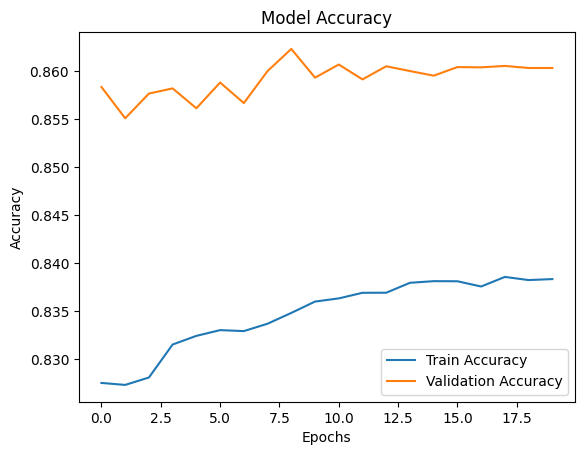

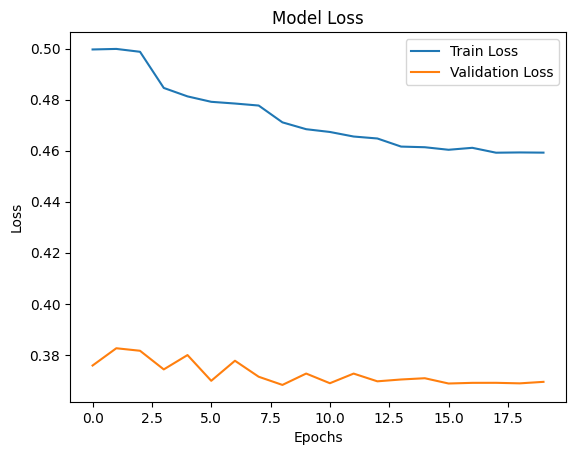

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Over the course of the deep learning, training was rather unstable. This is understandable as my local machine feel asleep a few times during the long procss. However, validation accuracy and loss were steady showing once again that script is only partially at fault here.  


**Analyze Misclassifications to identify classes where the model performs poorly to focus on improvements**

3636/3636 [==============================] - 23s 6ms/step


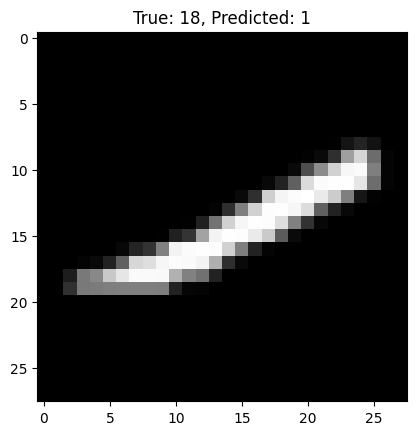

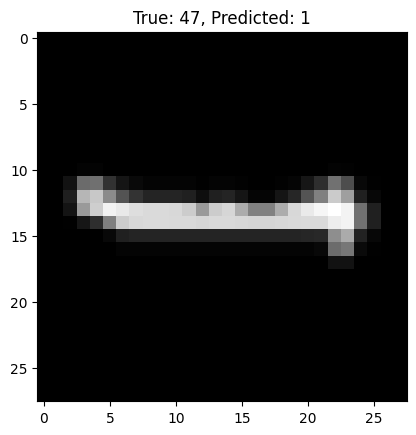

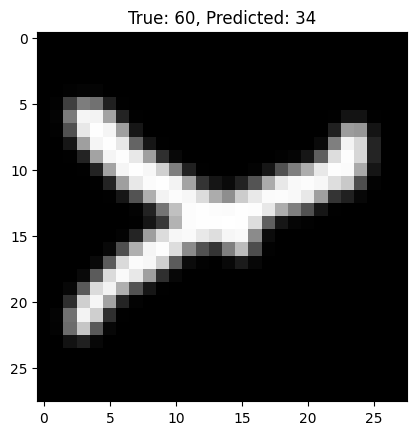

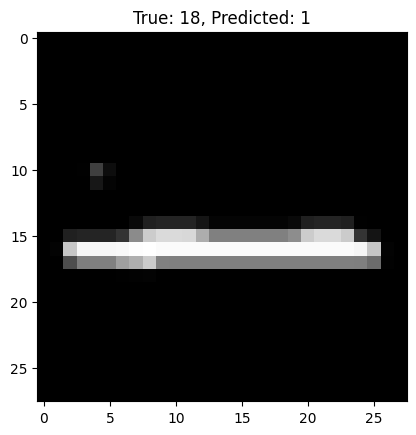

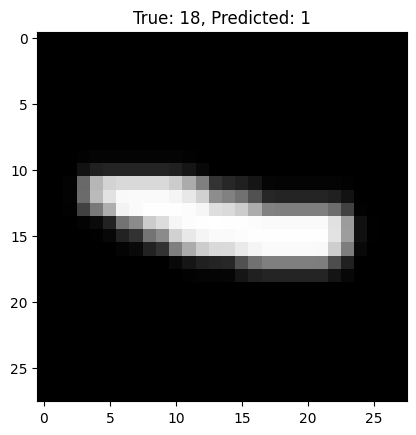

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

misclassified_indices = np.where(y_pred_classes != y_true)[0]

for i in range(5):  
    idx = misclassified_indices[i]
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.show()

These misclassifications are understandable as lowercase "l" and uppercase "I" are one of the most misinterpreted letters of the latin alphabet. It seems like sideways "Y", "J" and "T" are very confusing depending on how long or short their "accents" are drawn.